In [1]:
##LESSON 3 FASTAI RANDOM FOREST FROM SCRATCH

In [2]:
##THE HEIGHT OF A TREE = log base 2 (no_samples_taken_to_construct_that_tree)
##No. of leaf nodes = no.of samples taken to construct a tree and this is actually the final decision made by the tree which is
##comparatively less as compare to the whole dataset.
##So to solve this problem we have to make each estimator a strong predictor and they should have very less correlation between
##them.

In [3]:
##Loading all the libraries

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline

In [6]:
from fastai.imports import *  
from fastai.structured import *

In [7]:
from pandas_summary import DataFrameSummary  ##for dataframe handling
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, RandomTreesEmbedding  ##for implementing the 
##random forest model. For this we can use anything like classifier or may be regressor. This entirely depends on the problem 
##which are going to solve

In [8]:
from IPython.display import display  ##importing IPython module
from sklearn import metrics  ##sklearn again for matrix operations

# Loading the dataset

In [9]:
data = pd.read_csv('data/bulldozer/Train.csv', low_memory = False, parse_dates=["saledate"])

In [10]:
data.head().transpose()

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
data.SalePrice = np.log(data.SalePrice)

In [12]:
add_datepart(data,'saledate')

In [13]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [14]:
train_cats(data)

In [15]:
data.UsageBand.cat.set_categories(['Low','Medium','High'], ordered=True, inplace=True)

In [16]:
x_com, y_com, nas = proc_df(data, 'SalePrice')

In [17]:
x_com

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,1,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,1,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,3,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,3,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False
5,1139255,1001274,4605,121,3.0,2004,508.0,1,493,175,...,353,False,False,False,False,False,False,1229558400,False,False
6,1139256,772701,1937,121,3.0,1993,11540.0,3,1453,419,...,239,False,False,False,False,False,False,1093478400,False,False
7,1139261,902002,3539,121,3.0,2001,4883.0,3,740,243,...,321,False,False,False,False,False,False,1132185600,False,False
8,1139272,1036251,36003,121,3.0,2008,302.0,1,779,250,...,239,False,False,False,False,False,False,1251331200,False,False
9,1139275,1016474,3883,121,3.0,1000,20700.0,2,1771,540,...,221,False,False,False,False,False,False,1186617600,False,False


In [18]:
y_com

array([11.09741, 10.95081,  9.21034, ...,  9.3501 ,  9.10498,  8.95545])

In [19]:
nas

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}

In [20]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [21]:
n_valid = 12000 
n_trn = len(x_com)-n_valid

##Splitting the complete dataset
raw_train, raw_valid = split_vals(data, n_trn)

##splitting the x_com and y_com
X_train, X_valid = split_vals(x_com, n_trn)
y_train, y_valid = split_vals(y_com, n_trn)

In [22]:
x_sub = X_train[['YearMade', 'MachineHoursCurrentMeter']]

In [23]:
x_sub

,YearMade,MachineHoursCurrentMeter
0,2004,68.0
1,1996,4640.0
2,2001,2838.0
3,2001,3486.0
4,2007,722.0
5,2004,508.0
6,1993,11540.0
7,2001,4883.0
8,2008,302.0
9,1000,20700.0


# Basic Data Structure For Random Forest From Scratch

In [24]:
##Here now we are going to implement the random forest and we are going to follow the top down approach

In [25]:
##Here x is a independent variable and y is dependent variable n_trees is number of trees, sample_size is how big you 
##wanna each sample to be. min_leaf is smallest leaf size. Then we are generating pseudorandom numberstarting with 42.
##Then we are storing the information in scipy object. Then we are creating the n_trees. 

##Now lets assume we have created a random forest with n_trees. So now we have to make the prediction also. So we will write 
##the prediction function. We will take the independent value to each tree in random forest make prediction and then taking
##the mean of all the prediction and then returning the value. This is TreeEnsemble.predict function and it is not recursive
##function over here.

##Now we are going to create_tree() function. So initially we are randomly shuffling the data and then we are picking up the 
##first column from that and creating the decision tree from that


In [26]:
class TreeEnsemble():
    def __init__(self, x, y, n_trees, sample_size, min_leaf=5):
        np.random.seed(42)
        self.x, self.y, self.sample_size, self.min_leaf = x, y, sample_size, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]
        
    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_size]
        return DecisionTree(self.x.iloc[idxs], self.y[idxs], min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis = 0)

In [27]:
##So here in decision tree class we are passing the randomly shuffled x and y values and then the shuffled data and min_leaf 
##parameter also. Then we are calculating the numbers of rows and columns in randomly shuffled sample and self.n contains
##the number of rows and self.c contains the number of columns in the randomly shuffled samples. And then we are calculating the
##mean of the dependent variable in sample and store the value in self.val variable. 

##Non-leaf nodes in the tree also have the score which tell us about how effective was the split is and this is calculated by
##self.score variable. So for the root node this value will be infinite. find_varsplit() will return the variable which we can
##use for the further splitting.

##Now on find_varsplit function we are going to go through each columns(self.c) and check for the better split. And then in 
##find_better_split are not going to do anything right now.

##is_leaf is the variable which check whether the given node is leaf or not like if the score in node is infinite then it is
##leaf node else it is non-leaf node.


##repr function will show you detail about the function in class like number of rows with mean value of the predicted variable,
##and if this node is leaf node then it will also show score, variable on which splitting is done.

In [28]:
class DecisionTree():
    def __init__(self, x, y, idxs=None, min_leaf=5):
        if idxs is None: idxs=np.arange(len(y))
        self.x, self.y, self.idxs, self.min_leaf = x, y, idxs, min_leaf
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
            
    def find_better_split(self, var_idx): pass
    
    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
    
    @property
    def is_leaf(self): return self.score==float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s;

In [29]:
##Initializing the instance or object of the class

In [30]:
m = TreeEnsemble(X_train, y_train, n_trees=10, sample_size=1000, min_leaf=3)

In [31]:
##Since for the first we only have the root node only which has all the data means no splitting is there. So it will tell you 
##number of rows and mean of the predicted values of each rows from each trees.

In [32]:
m.trees

[n: 1000; val:10.079014121552744,
 n: 1000; val:10.085332932805946,
 n: 1000; val:10.108097466956043,
 n: 1000; val:10.124298343808157,
 n: 1000; val:10.083996284370912,
 n: 1000; val:10.079342372062621,
 n: 1000; val:10.087933710913568,
 n: 1000; val:10.116509370667558,
 n: 1000; val:10.084432523138192,
 n: 1000; val:10.14435365289314]

In [33]:
##For the first tree (number of samples usedby it and predicted value by the first tree)

In [34]:
m.trees[0]

n: 1000; val:10.079014121552744

In [35]:
##All the rows are in the root node because we haven't make any split yet

In [36]:
m.trees[0].idxs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 

In [37]:
##Now we are going to compare our Random Forest with scikit learn's one.
##Below we are creating our model with x_subs and y_train and number of trees in forest is 1 and sample size is 1000
##This will predict the SalePrice for some random sample and tree variable gives the prediction value.
##Tree variable is consists of two things number of sample that we have used and value predicted for some random x and y.

In [38]:
ens = TreeEnsemble(x_sub, y_train, 1, 1000)
tree = ens.trees[0]
tree

n: 1000; val:10.079014121552744

In [39]:
##But we need to know for which random sample this model is trained. To achieve this we will make the use of class variables
##x and y

In [40]:
x_samp, y_samp = tree.x, tree.y

In [41]:
x_samp

,YearMade,MachineHoursCurrentMeter
153832,2001,0.0
199920,2001,0.0
355950,2004,109200.0
147921,1997,0.0
275302,1994,0.0
369472,1986,0.0
339457,1998,0.0
198346,2000,0.0
74142,2002,0.0
61770,1980,0.0


In [42]:
y_samp

array([ 9.15905, 10.5321 ,  8.88876, 10.35774, 10.34174,  9.87817,  9.79813, 10.20359,  9.30565,  9.15905,
       11.39639, 10.04325, 10.89674,  9.21034, 10.9682 ,  9.82553,  9.04782,  9.72615,  9.21034, 11.04292,
        9.51044,  9.74097,  8.69951,  9.43348,  9.25913,  9.3501 , 10.30895,  9.92818, 10.62133, 11.01863,
        9.61581, 11.15625, 10.87805, 10.59663, 10.43412,  9.49175, 10.81978, 10.37349, 11.40756,  9.5819 ,
        9.10498,  9.25913,  9.21034, 10.40426, 10.79958, 10.93311,  8.95545,  9.21034, 10.98529,  9.15905,
        9.95228, 10.23996, 10.7579 , 10.37349, 10.06476, 10.30895, 10.4631 ,  9.5819 ,  9.95228,  9.90349,
       10.7579 ,  9.95228,  9.85219,  8.77956, 10.40426, 11.01863, 10.81978,  9.04782, 10.64542,  9.30565,
       10.16585, 10.43412, 10.62133,  9.4727 , 10.83958, 10.57132,  9.07681,  8.92266,  9.25913,  9.90349,
       10.08581,  9.71112, 11.15625,  9.61581, 11.54248, 10.65726,  9.68034,  9.6486 ,  9.54681,  9.5819 ,
        9.21034, 10.34174,  9.15905, 

In [43]:
##These two columns are basically use for the training purpose

In [44]:
x_samp.columns

Index(['YearMade', 'MachineHoursCurrentMeter'], dtype='object')

In [45]:
##Now we are going to deploy the Random Forest of scikit with one tree and with max_depth = 1.
##max_depth = 1 because still we haven't used the find_varsplit() function. We are still working on the root node.
##bootstrap = False because we need to take the complete x_samp and y_samp to train the model.

In [46]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, max_depth=1)
m.fit(x_samp, y_samp)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
#draw_tree(m.estimators_[0], x_samp, precision=2)

In [48]:
##Now we have to define find_better_split() function.
##Here we are going to to take x as a particular variable(var_idx) and only those value of x will be taken which are in 
##self.idxs and y as a dependent values and then we are going to split the tree. Now we will take the first value of x and rows
##value greater than that will be in rhs and rows value less then and equal to that will be in lhs.

##No value is greater than the present value it means our rhs will be empty in that cases continues with the next value of x.
##In other case we will calculate the standard deviation of left tree and right tree and then we will calculate the total
##score and then if our score less then the earlier score then we will make the split.

In [49]:
def find_better_split(self, var_idx):
    x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
    
    for i in range(1,self.n-1):
        lhs = x<=x[i]
        rhs = x>x[i]
        if rhs.sum()==0: continue
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        c_score = lhs_std*lhs.sum() + rhs_std*rhs.sum()
        if c_score<self.score:
            self.var_idx, self.score, self.split = var_idx, c_score, x[i]
    

In [50]:
##Making the split based on MachineHoursCurrentMeter

In [51]:
%timeit find_better_split(tree,1)

243 ms ± 24.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
tree

n: 1000; val:10.079014121552744; score:681.0184057251435; split:3744.0; var:MachineHoursCurrentMeter

In [53]:
##Making the split based on YearMode

In [54]:
%timeit find_better_split(tree,0)

243 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
tree

n: 1000; val:10.079014121552744; score:658.5510186055949; split:1974.0; var:YearMade

In [56]:
##Since right now, the time complexities of the find_better_split() is around O(n^2). which is quite high and morever here in 
##the same function is putting the value less than and equal to x in the left subtree and greater than in right subtree. It is
##checking the value for each columns even if the same values are repeating again and again which is quite inefficient.

##So now we are going to optimize the above function

# Speeding things up

In [57]:
tree = TreeEnsemble(x_sub, y_train, 1, 1000).trees[0]

In [58]:
tree

n: 1000; val:10.079014121552744

In [59]:
##Now we know that we can calculate the standard deviation using the mean value also which is in O(1) time complexity.
##In below function cnt is the total number of samples and s1 is the sum of those sample and s2 is the sum of square of 
##those values.

In [60]:
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

In [61]:
##Hence we have reduce the time complexity of our find_better_split from O(n^2) to O(n) which is quite efficient.

In [62]:
def find_better_split(self, var_idx):
    x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
    
    sort_idx = np.argsort(x)
    sort_y,sort_x = y[sort_idx], x[sort_idx]
    rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
    lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

    for i in range(0,self.n-self.min_leaf):
        xi,yi = sort_x[i],sort_y[i]
        lhs_cnt += 1; rhs_cnt -= 1
        lhs_sum += yi; rhs_sum -= yi
        lhs_sum2 += yi**2; rhs_sum2 -= yi**2
        if i<self.min_leaf-1 or xi==sort_x[i+1]:
            continue
            
        lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
        rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
        curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
        if curr_score<self.score: 
            self.var_idx,self.score,self.split = var_idx,curr_score,xi

In [63]:
##Now we are going to test the above function

In [64]:
%timeit find_better_split(tree,1)

8.06 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
tree

n: 1000; val:10.079014121552744; score:681.0184057251353; split:3744.0; var:MachineHoursCurrentMeter

In [66]:
##As you can see that we are now much efficient then the previous one.

In [67]:
find_better_split(tree,0)
tree

n: 1000; val:10.079014121552744; score:658.5510186055565; split:1974.0; var:YearMade

In [68]:
##Insert the find_better_split in DecisionTree class

In [69]:
DecisionTree.find_better_split = find_better_split

In [70]:
##Running on x_sub sample

In [71]:
tree = TreeEnsemble(x_sub, y_train, 1, 1000).trees[0]
tree

n: 1000; val:10.079014121552744; score:658.5510186055565; split:1974.0; var:YearMade

# Creating the Full Tree

In [72]:
##Till now we have worked on 1st level of decision tree only now we are going to work on complete tree.
##For this we need to work on the  find_varsplit(self) function. Till now we are not remembering the columns name of the 
##decision tree. So now we are going to take the index into consideration for this purpose

In [73]:
def find_varsplit(self):
    for i in range(self.c): self.find_better_split(i)
    if self.is_leaf: return
    x = self.split_col
    lhs = np.nonzero(x<=self.split)[0]
    rhs = np.nonzero(x>self.split)[0]
    self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
    self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

In [74]:
##Here we are just checking whether this is leaf node or not if not then we are taking the columns index into lhs and rhs.
##And then passing to the DecisionTree again to make the decision tree on that node.

In [75]:
DecisionTree.find_varsplit = find_varsplit

In [76]:
tree = TreeEnsemble(x_sub, y_train, 1, 1000).trees[0]
tree

n: 1000; val:10.079014121552744; score:658.5510186055565; split:1974.0; var:YearMade

In [81]:
##We are accessing the values of each node in the decision tree

In [77]:
tree.rhs

n: 841; val:10.158064432982941; score:571.4803525045031; split:2005.0; var:YearMade

In [78]:
tree.lhs

n: 159; val:9.660892662981706; score:76.82696888346362; split:2800.0; var:MachineHoursCurrentMeter

In [79]:
tree.lhs.lhs

n: 150; val:9.619280538108496; score:71.15906938383463; split:1000.0; var:YearMade

In [80]:
tree.rhs.lhs

n: 813; val:10.140438373816052; score:550.1806493212129; split:1994.0; var:YearMade

In [82]:
tree.lhs.rhs

n: 9; val:10.354428077535193

In [83]:
##Since now we have a complete tree over here. So now we will go for the complete prediction.

# Prediction

In [85]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [86]:
cols = ['ModelID', 'YearMade', 'MachineHoursCurrentMeter', 'ProductSize', 'Enclosure', 'Coupler_System', 'saleYear']

In [87]:
%time tree = TreeEnsemble(X_train[cols], y_train, 1, 1000).trees[0]
tree

Wall time: 1.34 s


n: 1000; val:10.079014121552744; score:608.1609924488233; split:0.0; var:Coupler_System

In [88]:
##Now how we are going to define the set of prediction for a tree

In [91]:
def predict(self, x): return np.array([self.predict_row(xi) for xi in x])

In [92]:
DecisionTree.predict = predict

In [93]:
def predict_row(self, xi):
    if self.is_leaf: return self.val
    t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
    return t.predict_row(xi)

DecisionTree.predict_row = predict_row

In [97]:
##Now if node is leaf then return value. Else go to rhs or lhs based on self.split 
##Then predicting the value and then plotting it against the actual values

In [95]:
%time pred = tree.predict(X_valid[cols].values)

Wall time: 267 ms


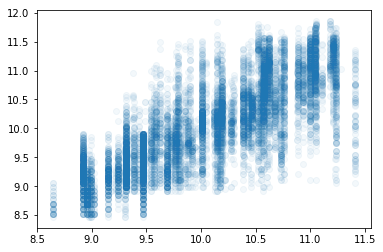

In [96]:
plt.scatter(pred, y_valid, alpha=0.05)

In [98]:
##Calculating the r^2 value

In [99]:
metrics.r2_score(pred, y_valid)

0.5258817830595283

In [100]:
##Now lets train the scikit learn model

In [102]:
m = RandomForestRegressor(n_estimators=1, min_samples_leaf=5, bootstrap=False)
%time m.fit(X_train[cols].values, y_train)

Wall time: 2 s


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

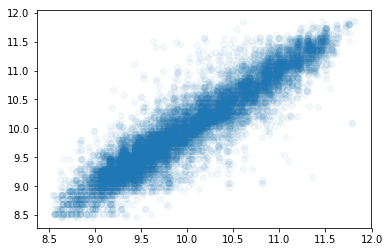

In [103]:
preds = m.predict(X_valid[cols].values)
plt.scatter(preds, y_valid, alpha=0.05)

In [104]:
metrics.r2_score(preds, y_valid)

0.8435513705695148

In [105]:
##Yes we are not that much good

# Combining all the things

In [106]:
class TreeEnsemble():
    def __init__(self, x, y, n_trees, sample_sz, min_leaf=5):
        np.random.seed(42)
        self.x,self.y,self.sample_sz,self.min_leaf = x,y,sample_sz,min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        return DecisionTree(self.x.iloc[idxs], self.y[idxs], 
                    idxs=np.array(range(self.sample_sz)), min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

In [107]:
class DecisionTree():
    def __init__(self, x, y, idxs, min_leaf=5):
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf-1 or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [108]:
ens = TreeEnsemble(X_train[cols], y_train, 5, 1000)

In [109]:
preds = ens.predict(X_valid[cols].values)

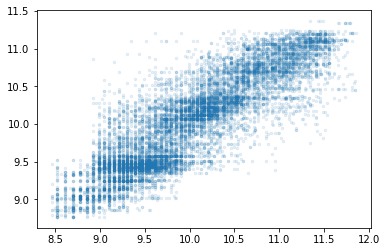

In [110]:
plt.scatter(y_valid, preds, alpha=0.1, s=6);

In [111]:
metrics.r2_score(y_valid, preds)

0.7491557831310173

In [114]:
##Loading the Cython 

##Cython is very much fast as compare to python

In [112]:
%load_ext Cython

In [115]:
def fib1(n):
    a, b = 0, 1
    while b < n:
        a, b = b, a + b

In [116]:
%%cython
def fib2(n):
    a, b = 0, 1
    while b < n:
        a, b = b, a + b

In [117]:
%%cython
def fib3(int n):
    cdef int b = 1
    cdef int a = 0
    cdef int t = 0
    while b < n:
        t = a
        a = b
        b = t + b

In [118]:
%timeit fib1(50)

810 ns ± 57.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [119]:
%timeit fib2(50)

402 ns ± 110 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [120]:
%timeit fib3(50)

86 ns ± 27 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [121]:
##So as we can see that initially we are calculating fibonnaci without cython then it takes 810ns
##Then with cython library it takes 401ns
##Then with cython library with cython data structures it takes 86ns
##In real, scikit learn developer are making the use of cython in order to reduce the computation time.